In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 85)

# Importing and Creating DataFrame

In [349]:
df = pd.read_csv('survey_results_public.csv', index_col='Respondent')
df_schema = pd.read_csv('survey_results_schema.csv', index_col='Column')

# Filtering Desired Data

In [350]:
df.columns

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'Webframe

In [351]:
# Creating a new DataFrame

df = df[['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'Country', 'Gender', 'YearsCode']]
df

,MainBranch,Hobbyist,Age,Age1stCode,Country,Gender,YearsCode
Respondent,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Germany,Man,36
2,I am a developer by profession,No,NaN,19,United Kingdom,NaN,7
3,I code primarily as a hobby,Yes,NaN,15,Russian Federation,NaN,4
4,I am a developer by profession,Yes,25.0,18,Albania,Man,7
5,"I used to be a developer by profession, but no...",Yes,31.0,16,United States,Man,15
...,...,...,...,...,...,...,...
64858,NaN,Yes,NaN,16,United States,NaN,10
64867,NaN,Yes,NaN,NaN,Morocco,NaN,NaN
64898,NaN,Yes,NaN,NaN,Viet Nam,NaN,NaN


# Handling Missing Values

In [352]:
# Dropping missing values for the desired columns

df.dropna(axis='index', subset=['MainBranch', 'Age', 'Gender'], inplace=True)
df.isna().sum()

MainBranch      0
Hobbyist        0
Age             0
Age1stCode    132
Country         0
Gender          0
YearsCode     197
dtype: int64

In [353]:
# Filling NaN's with 9999

df[df['YearsCode'].isnull()]
df[df['Age1stCode'].isnull()]

df.replace(np.nan, 9999, inplace=True)
df.isna().sum()

MainBranch    0
Hobbyist      0
Age           0
Age1stCode    0
Country       0
Gender        0
YearsCode     0
dtype: int64

In [354]:
# Check by percentage
100 * df.isnull().sum() / len(df)

MainBranch    0.0
Hobbyist      0.0
Age           0.0
Age1stCode    0.0
Country       0.0
Gender        0.0
YearsCode     0.0
dtype: float64

In [355]:
# Creating a function to display missing values

def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    if (len(percent_nan) <= 0):
        return print("No NAN values")
    
    return percent_nan

percent_nan = percent_missing(df)
percent_nan

No NAN values


# Checking/Converting Data Types

In [356]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44758 entries, 4 to 65629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MainBranch  44758 non-null  object 
 1   Hobbyist    44758 non-null  object 
 2   Age         44758 non-null  float64
 3   Age1stCode  44758 non-null  object 
 4   Country     44758 non-null  object 
 5   Gender      44758 non-null  object 
 6   YearsCode   44758 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB


(44758, 7)

In [357]:
# Changing values to numbers

df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 51, inplace=True)

df['Age1stCode'].replace('Younger than 5 years', 4, inplace=True)
df['Age1stCode'].replace('Older than 85', 86, inplace=True)

df['YearsCode'].unique()
df['Age1stCode'].unique()

array(['18', '16', '12', '20', '14', '13', '42', '8', '15', '30', '21',
       '10', '46', '9', '7', '11', '17', '6', '19', '25', '31', '29', '5',
       4, '28', '38', '23', '22', '41', '24', '26', '35', '27', '32',
       '40', '33', '36', '54', 9999, '48', '45', '44', '34', 86, '39',
       '51', '68', '50', '37', '43', '53', '85', '47', '64', '55', '58',
       '49', '72', '73', '63'], dtype=object)

In [358]:
# Converting number to int

df['YearsCode'] = df['YearsCode'].astype(int)
df['Age1stCode'] = df['Age1stCode'].astype(int)
df['Age'] = df['Age'].astype(int)

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44758 entries, 4 to 65629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MainBranch  44758 non-null  object
 1   Hobbyist    44758 non-null  object
 2   Age         44758 non-null  int64 
 3   Age1stCode  44758 non-null  int64 
 4   Country     44758 non-null  object
 5   Gender      44758 non-null  object
 6   YearsCode   44758 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


(44758, 7)

# Checking for Outliers in the Data

<AxesSubplot:xlabel='Age', ylabel='Age1stCode'>

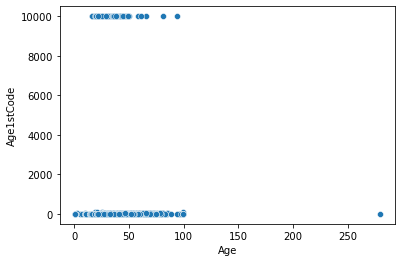

In [359]:
# plt.figure(figsize=(8, 12), dpi=200)

sns.scatterplot(data=df, x='Age', y='Age1stCode')

<AxesSubplot:xlabel='Age', ylabel='MainBranch'>

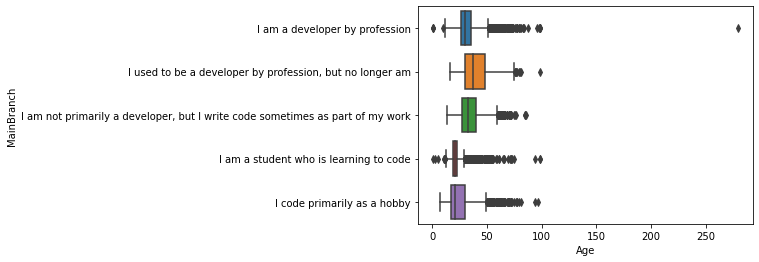

In [360]:
sns.boxplot(x='Age', y='MainBranch', data=df, orient='h')

In [361]:
df.nsmallest(10, 'Age')
df.nlargest(10, 'Age')

,MainBranch,Hobbyist,Age,Age1stCode,Country,Gender,YearsCode
Respondent,,,,,,,
14419,I am a developer by profession,Yes,279,16,Netherlands,Man,7
2522,I am a developer by profession,Yes,99,16,United States,Man,40
2638,I am a developer by profession,No,99,86,Canada,"Woman;Man;Non-binary, genderqueer, or gender n...",51
26839,I am a student who is learning to code,Yes,99,17,India,"Non-binary, genderqueer, or gender non-conforming",4
48563,I am a developer by profession,Yes,99,11,Kyrgyzstan,"Woman;Man;Non-binary, genderqueer, or gender n...",7
52018,"I used to be a developer by profession, but no...",Yes,99,6,Algeria,"Non-binary, genderqueer, or gender non-conforming",6
58030,I am a student who is learning to code,Yes,99,10,India,Man,6
21351,I am a developer by profession,No,98,17,India,"Non-binary, genderqueer, or gender non-conforming",6
6409,I code primarily as a hobby,Yes,97,4,Japan,Woman,51


In [362]:
# Filtering the Outliers
df = df[(df['Age'] >= df['Age1stCode']) &
       (df['Age'] < 85) & 
       (df['Age'] > 5)]

df[df['YearsCode'] == 9999]

,MainBranch,Hobbyist,Age,Age1stCode,Country,Gender,YearsCode
Respondent,,,,,,,
422,I am a developer by profession,Yes,45,10,Canada,Man,9999
2692,I am a developer by profession,Yes,43,9,Sweden,Man,9999
3473,I am a student who is learning to code,Yes,31,16,Canada,Man,9999
4664,"I am not primarily a developer, but I write co...",Yes,25,12,France,Man,9999
6142,I am a student who is learning to code,No,24,18,India,Man,9999
...,...,...,...,...,...,...,...
59787,I am a developer by profession,No,31,16,India,Man,9999
60026,I am a developer by profession,Yes,30,18,Brazil,Man,9999
60266,I am a student who is learning to code,No,22,19,Nigeria,Man,9999


<AxesSubplot:xlabel='Age', ylabel='Age1stCode'>

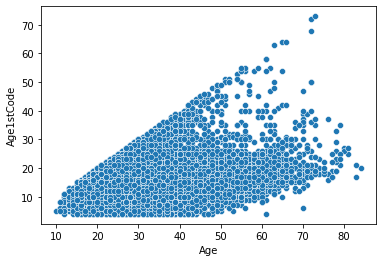

In [363]:
sns.scatterplot(data=df, x='Age', y='Age1stCode')

<AxesSubplot:xlabel='Age', ylabel='MainBranch'>

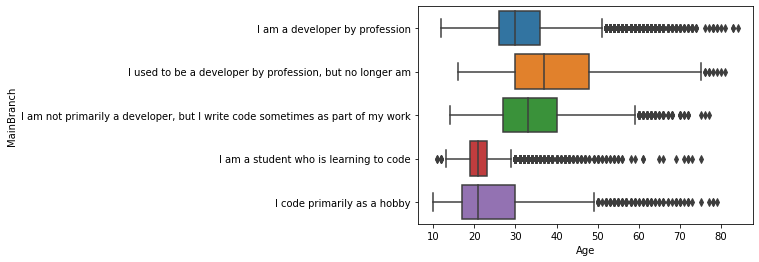

In [364]:
sns.boxplot(x='Age', y='MainBranch', data=df, orient='h')

# Exploring the Data

In [365]:
# Grouping Data

def std(x):
    return np.std(x)

df.groupby(['MainBranch'], 
           as_index=True)['Age', 
                          'Age1stCode'
                         ].agg(['mean', std])


/tmp/ipykernel_918579/1399347767.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['MainBranch'],


Age             \
                                                         mean        std   
MainBranch                                                                 
I am a developer by profession                      31.671966   8.540922   
I am a student who is learning to code              22.156269   6.013291   
I am not primarily a developer, but I write cod...  34.577885  10.103909   
I code primarily as a hobby                         25.338527  12.595083   
I used to be a developer by profession, but no ...  39.810179  13.152675   

                                                   Age1stCode            
                                                         mean       std  
MainBranch                                                               
I am a developer by profession                      15.117875  4.639961  
I am a student who is learning to code              15.865003  5.637711  
I am not primarily a developer, but I write cod...  15.617164  5.908918  
I code primarily as a hobby                         14.584986  7.050044  
I used to be a developer by profession, but no ...  14.951857  5.125296

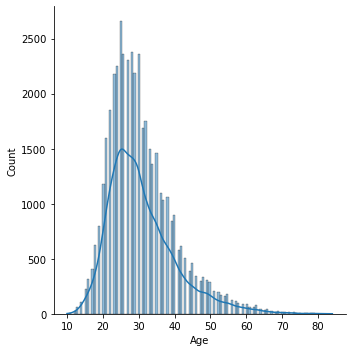

In [366]:
# Value Counts

df['Age'].value_counts()
df['Age1stCode'].value_counts()

sns.displot(data=df, x='Age', kde=True)

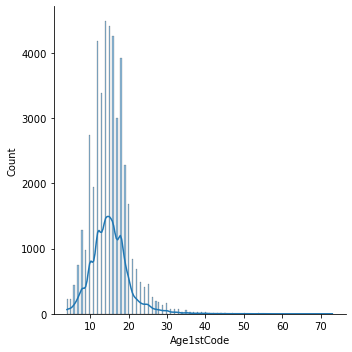

In [367]:
sns.displot(data=df, x='Age1stCode', kde=True)